In [32]:
# PYTORCH IMPORTS
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# OTHER USEFUL PYTHON MODULES AND PACKAGES
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import gymnasium as gym
import imageio
import flappy_bird_gym

# IMPORT gym
import gym
from gym import spaces
from gym.utils import seeding

# BASE PYTHON IMPORTS

import random
from collections import deque, namedtuple
from itertools import count
import time
from pathlib import Path


# SET UP MATPLOTLIB
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [2]:
# run this cell if matplotlib causes python kernel dead
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
# # check your environment
# import sys
# print(sys.executable)
# print(torch.__file__) 
# print(torch.cuda.is_available())
# from torch.utils import collect_env
# print(collect_env.main())

## Define A New Environment to Simulate The Stock Trading

To position the bird on the rightmost side of the screen, you can set the bird's x-coordinate to a fixed value that corresponds to the rightmost edge of the screen. The y-coordinate can be randomized within a range to simulate the starting price of the stock.

To generate the ideal trajectory, you can sample from a normal distribution to simulate the stock price movements. The mean and standard deviation of the distribution can be adjusted to simulate different market conditions. You can generate a new value at each time step and use it as the position of the pipes in the original Flappy Bird game.

To implement the actions, you can define three actions - 'up', 'down', and 'keep' - that correspond to buying, selling, and holding the stock, respectively. These actions will change the bird's y-coordinate, which corresponds to the stock price.

To calculate the reward, you can compare the bird's y-coordinate to the ideal trajectory at each time step. If the bird is higher than the trajectory, the reward can be positive, and if it's lower, the reward can be negative. The value of the reward can be determined by the distance between the bird's y-coordinate and the trajectory.

To set the initial reward to 100 and the stop condition to when the reward is below 0 or after 1000 trajectory points, you can initialize the reward to 100 at the start of the game and decrement it by the absolute value of the reward at each time step. The game should stop if the reward falls below 0 or if the game reaches 1000 time steps.

In [91]:
# remove the old env
env_dict = gym.envs.registration.registry.env_specs.copy()


for env in env_dict:
    if 'StockBird-v0' in env:
        print("Remove {} from registry".format(env))
        del gym.envs.registration.registry.env_specs[env]

Remove StockBird-v0 from registry


In [92]:
import stock_bird_env

# Register the environment with gym.make()
gym.envs.registration.register(
    id='StockBird-v0',
    entry_point='stock_bird_env:StockBirdEnv',
)

# Create an instance of the environment and reset it
env = gym.make('StockBird-v0')

In [87]:
# test the new env
env = StockBirdEnv()
state = env.reset()

# Convert state to 1D numpy array
state = np.array(state).flatten()

# Print the number of observation features
print('# Observation Features:', len(state), '\n')

# Print the number of possible actions
print('# Possible Actions:', env.action_space.n, '\n')

# Print the initial observation
print('Initial Observation:', '\n')
print(state, '\n')

# Print the type of the observation array
print('Observation array is of type:', type(state))

env.close()

# Observation Features: 1 

# Possible Actions: 3 

Initial Observation: 

[0] 

Observation array is of type: <class 'numpy.ndarray'>


AttributeError: 'StockBirdEnv' object has no attribute 'state'

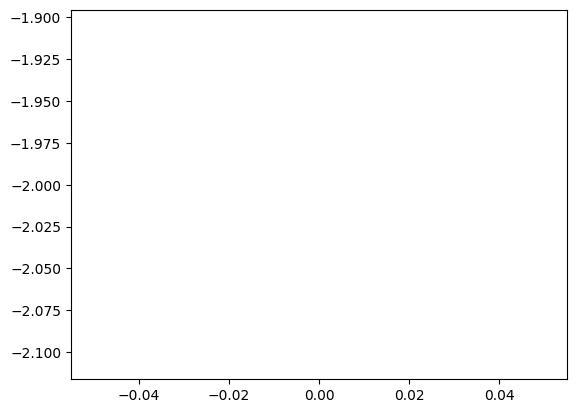

In [93]:
env = gym.make('StockBird-v0')
obs = env.reset()

done = False
while not done:
    env.render()

    # Get user input from keyboard
    action = None
    while action is None:
        key = input("Action (up/down/keep): ")
        if key == "up":
            action = 0
        elif key == "down":
            action = 1
        elif key == "keep":
            action = 2

    # Take a step in the environment
    obs, reward, done, _ = env.step(action)
